In [1]:
import pandas as pd;import numpy as np 
import matplotlib.pyplot as plt; import matplotlib.ticker as ticker
import random
import pathlib
from matplotlib.patches import Polygon
import math 
import os 

In [2]:
case = 1 ; index = "c"
loc_1 = "0_Data/Case_"+str(case)+str(index)+"/01_KPI/"

case = 1 ; index = "d"
loc_2 = "0_Data/Case_"+str(case)+str(index)+"/01_KPI/"

plot_ep = 700; roll_window = 50

In [3]:
kpi_case_1c = pd.read_csv(loc_1+'KPI_SAC_1c.csv')
kpi_case_1c=kpi_case_1c[0:3000]
kpi_case_1c['avg_cost'] = kpi_case_1c['total_cost'].rolling(window=roll_window).mean()

kpi_case_1d = pd.read_csv(loc_2+'KPI_SAC_1d.csv')
kpi_case_1d=kpi_case_1d[0:1500]
kpi_case_1d['avg_cost'] = kpi_case_1d['total_cost'].rolling(window=roll_window).mean()




In [4]:
avg_g_start_300 = kpi_case_1d['avg_cost'][0:300].mean()
avg_g_end_300 = kpi_case_1d['avg_cost'][-300:].mean()

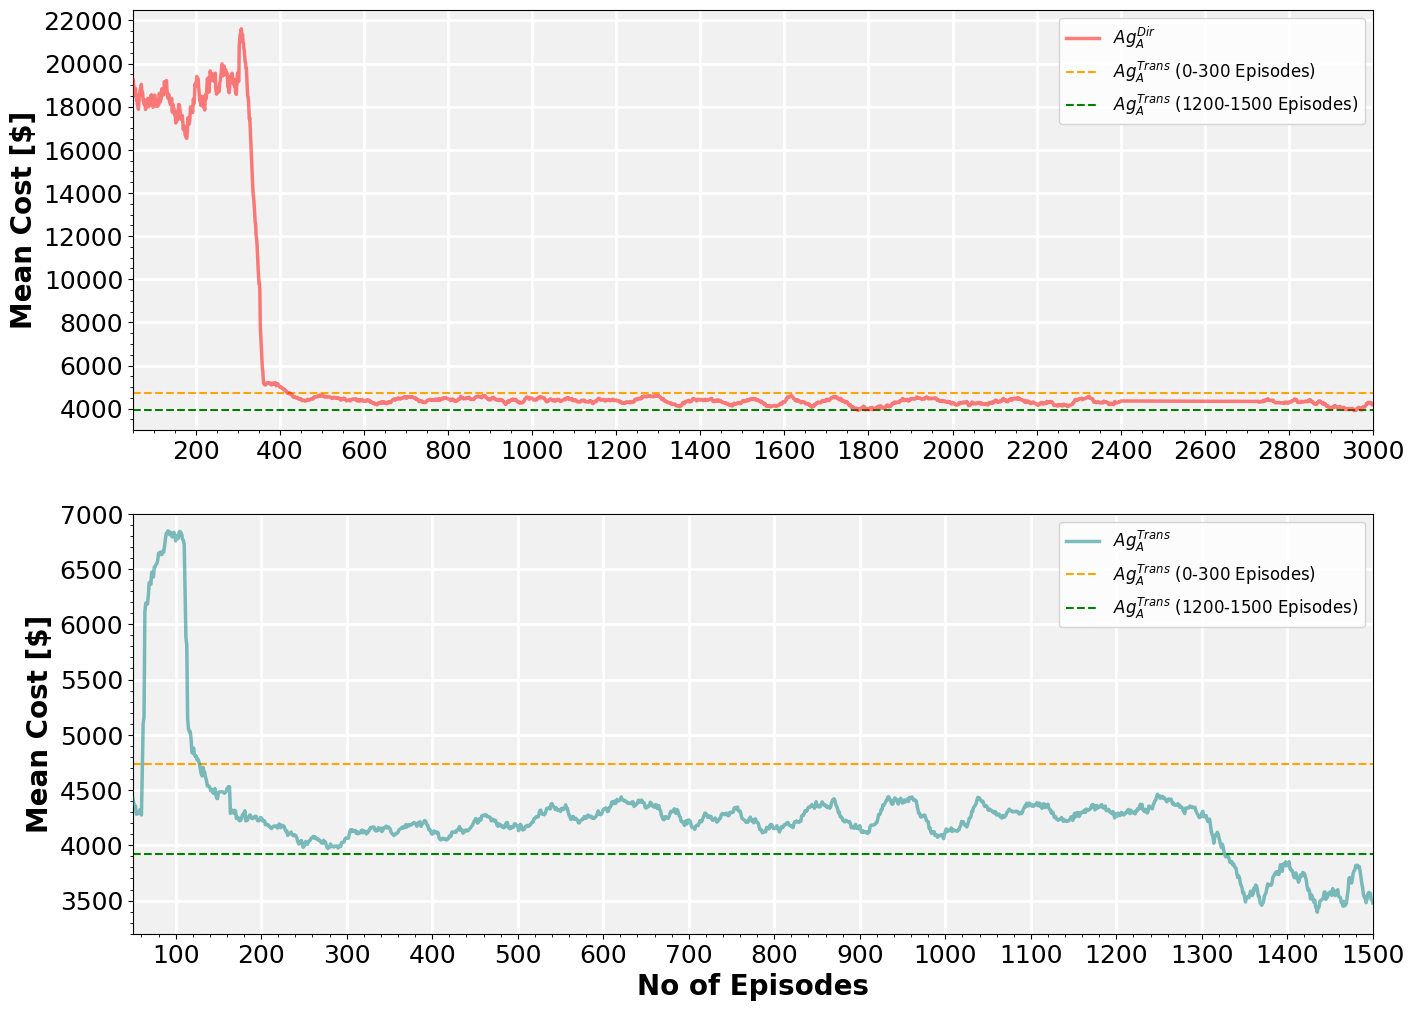

In [5]:
progress_plot=plt.figure(figsize=(16,12))
#f.suptitle('DQN Performance in Episode: '+str(episode),size=24, y =.95)
#filt_data["Hours"]= filt_data["Hours"]%24

# up_limit=7500
# low_limit=500
legend_size = 12
font_size = 20
label_size = 18

x3 = progress_plot.add_subplot(2,1,1)

#x2.plot(filt_data['Hours'],filt_data["Total_Pow_Dem_0"], label= "Total Power Demand Core ",color="red", linewidth = 1.5,dashes=(4, 2))
#x3.plot(filt_data_st['Hours'],filt_data_st["mean_Temp"], label= "Mean Temp at (Ep: "+str(1)+" (Spawn)",color="steelblue", linewidth = 2)
#x3.step(filt_data_st['Hours'],filt_data_st['Lower_Setpoint'],where="post",label= "Upper/Lower Comfort Band",color="grey",linestyle='--',dashes=(2, 2),linewidth = 2)

x3.set_xlim([roll_window,3000])
# x3.set_ylim([low_limit, up_limit])
x3.yaxis.set_major_locator(ticker.MultipleLocator(2000))
x3.xaxis.set_major_locator(ticker.MultipleLocator(200))
# x3.axhline(y=800, color='red', linestyle='--', label='7-day Mean Starting Cost [$] in Training using Imitation Learning', linewidth=2.5, dashes=(2, 1),zorder=7)
x3.minorticks_on()
x3.grid(which='major', linewidth=2,color='white')
x3.set_ylabel('Mean Cost [$]',fontsize=font_size,fontweight='bold')

x3.set_facecolor("gainsboro")
x3.patch.set_alpha(0.4)
x3.tick_params(axis='y', labelsize= label_size)
x3.tick_params(axis='x', labelsize= label_size)
x3.plot(kpi_case_1c['episodes'],kpi_case_1c['avg_cost'],label= '$Ag^{Dir}_{A}$',alpha =0.5, color="r", linewidth=2.5,zorder=11)
x3.axhline(y=avg_g_start_300, color='orange', linestyle='--', label='$Ag^{Trans}_{A}$ (0-300 Episodes)',alpha =1)
x3.axhline(y=avg_g_end_300, color='green', linestyle='--', label='$Ag^{Trans}_{A}$ (1200-1500 Episodes)',alpha =1)
# x3.plot(kpi_rl2['episodes'],kpi_rl2['avg_cost'],label='$Ag^{Guid}_{RL,2}$',alpha =0.5, color="orange", linewidth=2,zorder=11)
# x3.plot(kpi_rl3['episodes'],kpi_rl3['avg_cost'],label='$Ag^{Guid}_{RL,3}$',alpha =0.5, color="g", linewidth=2,zorder=11)
# x3.plot(kpi_rl4['episodes'],kpi_rl4['avg_cost'],label='$Ag^{Guid}_{RL,4}$',alpha =0.5, color="b", linewidth=2,zorder=11)
# x3.plot(kpi_rl5['episodes'],kpi_rl5['avg_cost'],label='$Ag^{Imit}_{RL,5}$',alpha =0.1, color="k", linewidth=2,zorder=11)
# x3.plot(kpi_rl6['episodes'],kpi_rl6['avg_cost'],label='$Ag^{Imit+Guid}_{RL,6}$',alpha =0.05, color="k", linewidth=2,zorder=11)


# x3.plot(kpi_init['episodes'],kpi_init['avg_cost'],label='RL w/init',alpha =0.5, color="g", linewidth=2,zorder=11)
# x3.plot(kpi_dqn_irl['episodes'],kpi_dqn_irl['avg_cost_irl'],label='7-day Mean Cost [$] in RL training with IRL', color="steelblue", linewidth=3.5,zorder=11)
# x3.set_title("Occupancy Schedule",fontweight='bold',fontsize=15)
# x3.set_xlabel('No of Episodes',fontsize=font_size,fontweight='bold')
x3.legend(loc='upper right',prop={'size': legend_size})

x4 = progress_plot.add_subplot(2,1,2)
x4.set_xlim([roll_window, 1500])
x4.set_ylim([3200,7000])
x4.yaxis.set_major_locator(ticker.MultipleLocator(500))
x4.xaxis.set_major_locator(ticker.MultipleLocator(100))
# x3.axhline(y=800, color='red', linestyle='--', label='7-day Mean Starting Cost [$] in Training using Imitation Learning', linewidth=2.5, dashes=(2, 1),zorder=7)
x4.minorticks_on()
x4.grid(which='major', linewidth=2,color='white')
x4.set_ylabel('Mean Cost [$]',fontsize=font_size,fontweight='bold')

x4.set_facecolor("gainsboro")
x4.patch.set_alpha(0.4)
x4.tick_params(axis='y', labelsize= label_size)
x4.tick_params(axis='x', labelsize= label_size)
x4.plot(kpi_case_1d['episodes'],kpi_case_1d['avg_cost'],label= '$Ag^{Trans}_{A}$',alpha =0.5, color="teal", linewidth=2.5,zorder=11,)
# x4.plot(kpi_rl2['episodes'],kpi_rl2['avg_cost'],label='$Ag^{Guid}_{RL,2}$',alpha =0.05, color="k", linewidth=2,zorder=11)
# x4.plot(kpi_rl3['episodes'],kpi_rl3['avg_cost'],label='$Ag^{Guid}_{RL,3}$',alpha =0.1, color="k", linewidth=2,zorder=11)
# x4.plot(kpi_rl4['episodes'],kpi_rl4['avg_cost'],label='$Ag^{Guid}_{RL,4}$',alpha =0.15, color="k", linewidth=2,zorder=11)
# x4.plot(kpi_rl5['episodes'],kpi_rl5['avg_cost'],label='$Ag^{Imit}_{RL,5}$',alpha =0.5, color="steelblue", linewidth=2,zorder=11)
# x4.plot(kpi_rl6['episodes'],kpi_rl6['avg_cost'],label='$Ag^{Imit+Guid}_{RL,6}$',alpha =0.5, color="teal", linewidth=2,zorder=11)
# x4.axhline(y=avg_first, color='darkred', linestyle='--', label='Avg Cost (200-500 Episodes)',alpha =0.5)
x4.axhline(y=avg_g_start_300, color='orange', linestyle='--', label='$Ag^{Trans}_{A}$ (0-300 Episodes)',alpha =1.0)
x4.axhline(y=avg_g_end_300, color='green', linestyle='--', label='$Ag^{Trans}_{A}$ (1200-1500 Episodes)',alpha =1.0)


# x3.plot(kpi_init['episodes'],kpi_init['avg_cost'],label='RL w/init',alpha =0.5, color="g", linewidth=2,zorder=11)
# x3.plot(kpi_dqn_irl['episodes'],kpi_dqn_irl['avg_cost_irl'],label='7-day Mean Cost [$] in RL training with IRL', color="steelblue", linewidth=3.5,zorder=11)
# x3.set_title("Occupancy Schedule",fontweight='bold',fontsize=15)
x4.set_xlabel('No of Episodes',fontsize=font_size,fontweight='bold')
x4.legend(loc='upper right',prop={'size': legend_size})

z="0_Data/Case_"+str(case)+str(index)+"/05_Figures/"+"06_Case4b_Progress_plot_1.jpg"

plt.savefig(z,dpi=700)


In [3]:
episode =1
df_plot = data
# df_plot = pd.read_csv("0_Data/Case_"+str(case)+str(index)+"/03_Data/historian_data_"+str(episode)+".csv")

df_plot['tot_elec'] = df_plot['elec_equip'] + df_plot['elec_lights'] + df_plot['hvac_dem_tot']
df_plot.columns

NameError: name 'data' is not defined

In [20]:
case = 1 ; index = "d"; episode = 1521
df_plot = pd.read_csv("0_Data/Case_"+str(case)+str(index)+"/03_Data/historian_data_"+str(episode)+".csv")

df_plot['tot_elec'] = df_plot['elec_equip'] + df_plot['elec_lights'] + df_plot['elec_hvac']
df_plot.columns

Index(['Unnamed: 0', 'Temp_mean_p0', 'Temp_mean_m1', 'sen_hou', 'temp_OA',
       'rh_OA', 'price', 'tdisc_cost', 'energy_cost', 'tdisc', 'ener', 'cost',
       'flag', 'elec_equip', 'elec_lights', 'elec_hvac', 'u_heat_stp',
       'u_cool_stp', 'Occ', 'rewards', 'unproc_u_heat_stp',
       'unproc_u_cool_stp', 'X_t', 'next_states_n', 'dc_power',
       'net_grid_power', 'pow_sold', 'batt_pow_prov', 'cur_soc',
       'curr_batt_cap', 'batt_dem', 'tot_elec'],
      dtype='object')

In [4]:
int(max(df_plot['dc_power'][:-1].max(),df_plot['pow_sold'][:-1].max())/(10*1000))*1000

0

In [156]:
case = 1 ; index = "d"; episode = 1950

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\didso\AppData\Local\Temp\ipykernel_7316\227871956.py:221: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


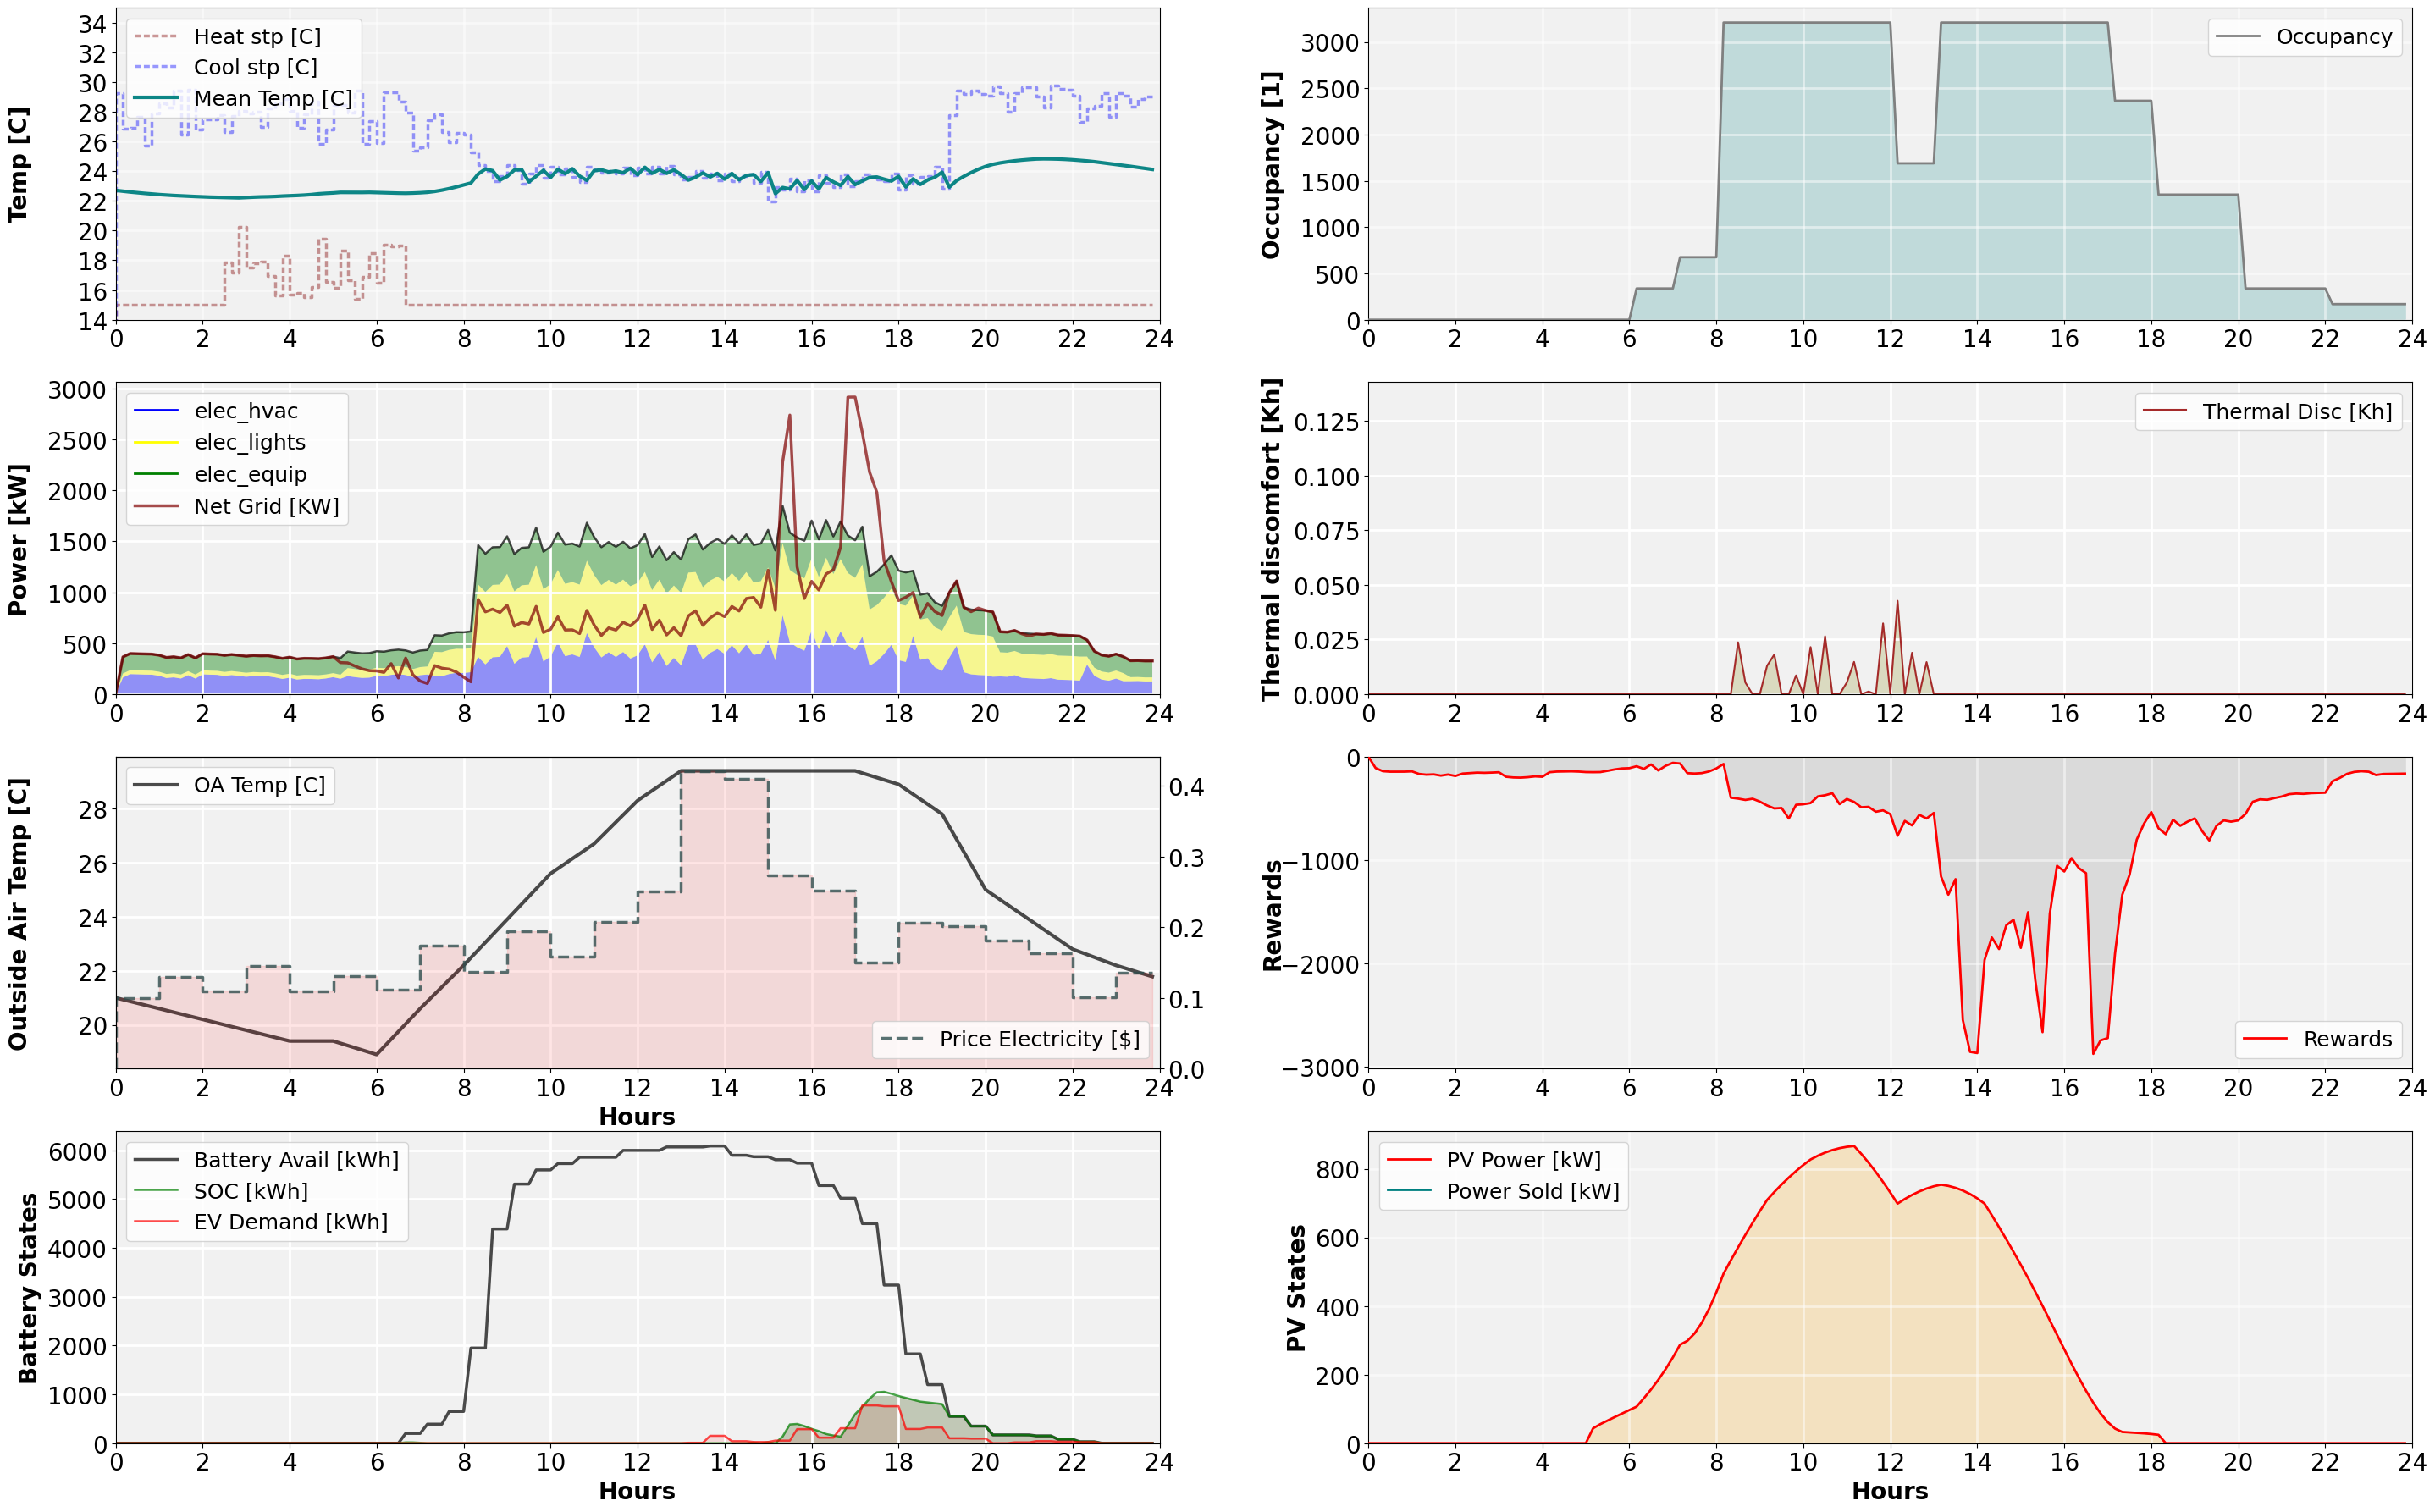

In [157]:
day_of_year = 12 


df_plot = pd.read_csv("0_Data/Case_"+str(case)+str(index)+"/03_Data/historian_data_"+str(episode)+".csv")

df_plot['tot_elec'] = df_plot['elec_equip'] + df_plot['elec_lights'] + df_plot['elec_hvac']

fig = plt.figure(figsize=(35,45), facecolor='white')

no_of_plots = 8
lw_act ,alpha_act = 2.5 , 0.4
label_size = 22
tick_size = 20
legend_size = 18
fontsize = 20
loc_1 = "upper right"

x1a = fig.add_subplot(no_of_plots, 2, 1)
x1b = fig.add_subplot(no_of_plots, 2, 3)
x1c = fig.add_subplot(no_of_plots, 2, 5)
x1d = fig.add_subplot(no_of_plots, 2, 7)

x2a = fig.add_subplot(no_of_plots, 2, 2)
x2b = fig.add_subplot(no_of_plots, 2, 4)
x2c = fig.add_subplot(no_of_plots, 2, 6)
x2d = fig.add_subplot(no_of_plots, 2, 8)

x_align,y_align = -0.08,0.5

x1a.get_yaxis().set_label_coords(x_align,y_align)
x1b.get_yaxis().set_label_coords(x_align,y_align)
x1c.get_yaxis().set_label_coords(x_align,y_align)

x2a.get_yaxis().set_label_coords(x_align,y_align)
x2b.get_yaxis().set_label_coords(x_align,y_align)
x2c.get_yaxis().set_label_coords(x_align,y_align)

''' Temperature Plots '''
x1a.set_xlim([0,24])


x1a.xaxis.set_major_locator(ticker.MultipleLocator(2))
x1a.yaxis.set_major_locator(ticker.MultipleLocator(2))
# x1a.axvline(x=DR_time[0], color='grey', linestyle='--', linewidth=1, dashes=(2, 2))
# x1a.axvline(x=DR_time[1], color='grey', linestyle='--',linewidth=1, dashes=(2, 2))
x1a.grid(which='both', linewidth=0.5, color='white',zorder=3,alpha=0.5)
x1a.grid(which='major', linewidth=2, color='white',zorder=3,alpha=0.5)
x1a.patch.set_alpha(0.4)
x1a.set_ylim([14,35])

# x1a.step(df['senHouDec_y'], 22.5+df['act_01']*7.5,where="post", color='r',dashes=(4, 1), ls='--',linewidth =1,label='Supervisory Setpoint Action',alpha=0.4)
# x1a.plot(df['senHouDec_y'],df["meanTemp_y"] - 273.15,label='Mean Temp of all Zones[C]', color="steelblue", linewidth=2*scale,zorder=7)

x1a.step(df_plot['sen_hou'][:-1],df_plot['u_heat_stp'][:-1],where="pre", color='maroon', dashes=(2, 1), ls='--', label='Heat stp [C]',linewidth=lw_act,alpha =alpha_act)
x1a.step(df_plot['sen_hou'][:-1],df_plot['u_cool_stp'][:-1], where="pre", color='blue', dashes=(2, 1), ls='--',label='Cool stp [C]', linewidth=lw_act,alpha =alpha_act)
x1a.plot(df_plot['sen_hou'][:-1],df_plot['Temp_mean_p0'][:-1], color='teal', linewidth=3,label='Mean Temp [C]',alpha = 0.95)
x1a.set_facecolor("gainsboro")
x1a.tick_params(axis='y', labelsize= tick_size)
x1a.tick_params(axis='x', labelsize= tick_size)
x1a.set_ylabel('Temp [C]',fontsize=fontsize,fontweight='bold')
x1a.legend(loc='upper left',prop={'size': legend_size}).set_zorder(15)

sequence = ['elec_hvac','elec_lights','elec_equip']
alpha =  [ 0.4,      0.4,    0.4] 
colors = ['blue','yellow','green']

x1b.plot([],[],color=colors[0], label=sequence[0], linewidth=2) 
x1b.plot([],[],color=colors[1], label=sequence[1], linewidth=2) 
x1b.plot([],[],color=colors[2], label=sequence[2], linewidth=2)

x1b.xaxis.set_major_locator(ticker.MultipleLocator(2))
x1b.yaxis.set_major_locator(ticker.MultipleLocator(500))
x1b.set_facecolor("gainsboro")
x1b.plot(df_plot['sen_hou'][:-1], df_plot['elec_hvac'][:-1]+df_plot['elec_equip'][:-1]+df_plot['elec_lights'][:-1],color='k',alpha = 0.7,linewidth=1.8)
x1b.stackplot(df_plot['sen_hou'][:-1], df_plot[sequence[0]][:-1],df_plot[sequence[1]][:-1],df_plot[sequence[2]][:-1],colors=colors,alpha = alpha)
x1b.plot(df_plot['sen_hou'][:-1], df_plot['net_grid_power'][:-1],color='maroon',alpha = 0.7,linewidth=2.5,label='Net Grid [KW]')
x1b.grid(which='both', linewidth=0.5, color='white',zorder=3)
x1b.grid(which='major', linewidth=2, color='white',zorder=3)
x1b.tick_params(axis='y', labelsize= tick_size)
x1b.tick_params(axis='x', labelsize= tick_size)
x1b.patch.set_alpha(0.4)
x1b.set_xlim([0,24])
x1b.legend(loc='upper left',prop={'size': legend_size}).set_zorder(15)
x1b.set_ylabel('Power [kW]',fontsize=fontsize,fontweight='bold')

# x1a.step(df['senHouDec_y'], 22.5+df['act_01']*7.5,where="post", color='r',dashes=(4, 1), ls='--',linewidth =1,label='Supervisory Setpoint Action',alpha=0.4)
# x1a.plot(df['senHouDec_y'],df["meanTemp_y"] - 273.15,label='Mean Temp of all Zones[C]', color="steelblue", linewidth=2*scale,zorder=7)
x1c_s = x1c.twinx()
x1c_s.step(df_plot['sen_hou'][:-1],df_plot['price'][:-1],where="pre", color='darkslategrey',ls='--', linewidth=2.5,alpha = 0.8,label = 'Price Electricity [$]')
x1c_s.stackplot(df_plot['sen_hou'][:-1], df_plot['price'][:-1],step='pre',color='r',alpha = 0.1)
x1c.set_ylabel('Temp [C], Day no: '+str(day_of_year ),fontsize=fontsize,fontweight='bold')
x1c.set_facecolor("gainsboro")
x1c.tick_params(axis='y', labelsize= tick_size)
x1c.tick_params(axis='x', labelsize= tick_size)
x1c.legend(loc=loc_1,prop={'size': legend_size}).set_zorder(15)
x1c.set_xlim([0,24])
x1c.xaxis.set_major_locator(ticker.MultipleLocator(2))
x1c.plot(df_plot['sen_hou'][:-1],df_plot['temp_OA'][:-1], color='k', linewidth=3,label='OA Temp [C]',alpha=0.7,)
# x1a.yaxis.set_major_locator(ticker.MultipleLocator())
# x1a.axvline(x=DR_time[0], color='grey', linestyle='--', linewidth=1, dashes=(2, 2))
# x1a.axvline(x=DR_time[1], color='grey', linestyle='--',linewidth=1, dashes=(2, 2))
x1c.set_xlabel('Hours',fontsize=fontsize,fontweight='bold')

x1c.grid(which='both', linewidth=0.5, color='white',zorder=3)
x1c.grid(which='major', linewidth=2, color='white',zorder=3)
# x1c.plot(df_plot['sen_hou'][:-1],df_plot['hvac_dem_tot'][:-1],color='r', dashes=(2, 2), ls='--', label='hvac_tot',linewidth=2)
x1c.patch.set_alpha(0.4)
x1c.set_xlim([0,24])
x1c.legend(loc='upper left',prop={'size': legend_size}).set_zorder(19)
x1c_s.legend(loc='lower right',prop={'size': legend_size}).set_zorder(16)
x1c_s.tick_params(axis='y', labelsize= tick_size)
x1c.set_ylabel('Outside Air Temp [C]')
# x1c_s.set_ylabel('Price [$]',fontsize=fontsize,fontweight='bold')

x1d.xaxis.set_major_locator(ticker.MultipleLocator(2))
x1d.yaxis.set_major_locator(ticker.MultipleLocator(1000))
x1d.set_facecolor("gainsboro")
x1d.plot(df_plot['sen_hou'][:-1], df_plot['curr_batt_cap'][:-1],color='k',label='Battery Avail [kWh]',alpha = 0.7,linewidth=2.5)
x1d.plot(df_plot['sen_hou'][:-1], df_plot['cur_soc'][:-1],color='g',label='SOC [kWh]',alpha = 0.7,linewidth=1.8)
x1d.plot(df_plot['sen_hou'][:-1], df_plot['batt_dem'][:-1],color='r',label='EV Demand [kWh]',alpha = 0.7,linewidth=1.8)
x1d.stackplot(df_plot['sen_hou'][:-1], df_plot['batt_dem'][:-1],color='r',alpha = 0.1)
x1d.stackplot(df_plot['sen_hou'][:-1], df_plot['cur_soc'][:-1],color='darkolivegreen',alpha = 0.3)
x1d.grid(which='both', linewidth=0.5, color='white',zorder=3)
x1d.grid(which='major', linewidth=2, color='white',zorder=3)
x1d.tick_params(axis='y', labelsize= tick_size)
x1d.tick_params(axis='x', labelsize= tick_size)
x1d.patch.set_alpha(0.4)
x1d.set_xlim([0,24])
x1d.set_xlabel('Hours',fontsize=fontsize,fontweight='bold')
x1d.legend(loc='upper left',prop={'size': legend_size}).set_zorder(15)
x1d.set_ylabel('Battery States',fontsize=fontsize,fontweight='bold')


x2a.xaxis.set_major_locator(ticker.MultipleLocator(2))
x2a.yaxis.set_major_locator(ticker.MultipleLocator(500))
x2a.patch.set_alpha(0.4)

# x1a.step(df['senHouDec_y'], 22.5+df['act_01']*7.5,where="post", color='r',dashes=(4, 1), ls='--',linewidth =1,label='Supervisory Setpoint Action',alpha=0.4)
x2a.plot(df_plot['sen_hou'][:-1],df_plot['Occ'][:-1],label='Occupancy', color="grey", linewidth=2,zorder=3)
x2a.stackplot(df_plot['sen_hou'][:-1], df_plot['Occ'][:-1],color='teal',alpha = 0.2)
x2a.set_ylabel('Occupancy [1]',fontsize=fontsize,fontweight='bold')
x2a.set_facecolor("gainsboro")
x2a.tick_params(axis='y', labelsize= tick_size)
x2a.tick_params(axis='x', labelsize= tick_size)
x2a.legend(loc=loc_1,prop={'size': legend_size}).set_zorder(15)
x2a.grid(which='both', linewidth=0.5, color='white',zorder=3,alpha=0.5)
x2a.grid(which='major', linewidth=2, color='white',zorder=3,alpha=0.5)
x2a.set_xlim([0,24])

x2b.xaxis.set_major_locator(ticker.MultipleLocator(2))
x2b.set_facecolor("gainsboro")
x2b.grid(which='both', linewidth=0.5, color='white',zorder=3)
x2b.grid(which='major', linewidth=2, color='white',zorder=3)
x2b.stackplot(df_plot['sen_hou'][:-1], df_plot['tdisc'][:-1],color='olive',alpha = 0.2)
x2b.tick_params(axis='y', labelsize= tick_size)
x2b.tick_params(axis='x', labelsize= tick_size)
x2b.plot(df_plot['sen_hou'][:-1],df_plot['tdisc'][:-1] , color='brown', linewidth=1.5,label='Thermal Disc [Kh]')
x2b.set_ylabel('Thermal discomfort [Kh]',fontweight='bold',fontsize=fontsize)
x2b.patch.set_alpha(0.4)
x2b.set_xlim([0,24])
x2b.set_ylim([0,df_plot['tdisc'].max()+0.1])
x2b.legend(loc='upper right',prop={'size': legend_size}).set_zorder(16)


# x1a.step(df['senHouDec_y'], 22.5+df['act_01']*7.5,where="post", color='r',dashes=(4, 1), ls='--',linewidth =1,label='Supervisory Setpoint Action',alpha=0.4)
# x1a.plot(df['senHouDec_y'],df["meanTemp_y"] - 273.15,label='Mean Temp of all Zones[C]', color="steelblue", linewidth=2*scale,zorder=7)

rewards_positive = [r if r > 0 else 0 for r in df_plot['rewards'][:-1]*100]
rewards_negative = [r if r < 0 else 0 for r in df_plot['rewards'][:-1]*100]


x2c.plot(df_plot['sen_hou'][:-1],df_plot['rewards'][:-1]*100,label='Rewards', color="red", linewidth=2,zorder=7)
x2c.set_ylabel('HVAC Power [W] ',fontsize=fontsize,fontweight='bold')


x2c.stackplot(df_plot['sen_hou'][:-1], rewards_positive,color='olive',alpha = 0.3)
x2c.stackplot(df_plot['sen_hou'][:-1], rewards_negative,color='grey',alpha = 0.2)

x2c.set_facecolor("gainsboro")
x2c.tick_params(axis='y', labelsize= tick_size)
x2c.tick_params(axis='x', labelsize= tick_size)
x2c.grid(which='both', linewidth=0.5, color='white',zorder=3,alpha=0.5)
x2c.grid(which='major', linewidth=2, color='white',zorder=3,alpha=0.5)
x2c.set_xlim([0,24])
# x2c.yaxis.set_major_locator(ticker.MultipleLocator(200))
x2c.xaxis.set_major_locator(ticker.MultipleLocator(2))
x2c.set_facecolor("gainsboro")
x2c.set_ylabel('Rewards',fontweight='bold',fontsize=fontsize)
x2c.grid(which='both', linewidth=0.5, color='white',zorder=3)
x2c.grid(which='major', linewidth=2, color='white',zorder=3)
x2c.patch.set_alpha(0.4)
x2c.set_xlim([0,24])
x2c.legend(loc='lower right',prop={'size': legend_size}).set_zorder(15)


x2d.plot(df_plot['sen_hou'][:-1],df_plot['dc_power'][:-1],label='PV Power [kW]', color="red", linewidth=2,zorder=7)
x2d.plot(df_plot['sen_hou'][:-1],df_plot['pow_sold'][:-1],label='Power Sold [kW]', color="teal", linewidth=2,zorder=7)
x2d.stackplot(df_plot['sen_hou'][:-1], df_plot['dc_power'][:-1],color='orange',alpha = 0.2)
x2d.stackplot(df_plot['sen_hou'][:-1], df_plot['pow_sold'][:-1],color='grey',alpha = 0.2)

x2d.set_facecolor("gainsboro")
x2d.tick_params(axis='y', labelsize= tick_size)
x2d.tick_params(axis='x', labelsize= tick_size)
x2d.grid(which='both', linewidth=0.5, color='white',zorder=3,alpha=0.5)
x2d.grid(which='major', linewidth=2, color='white',zorder=3,alpha=0.5)
# x2d.set_ylim([0,2000])
# x2d.yaxis.set_major_locator(ticker.MultipleLocator(int(max(df_plot['dc_power'][:-1].max(),df_plot['pow_sold'][:-1].max())/(10*1000))*1000))
x2d.xaxis.set_major_locator(ticker.MultipleLocator(2))
x2d.set_facecolor("gainsboro")
x2d.set_ylabel('PV States',fontsize=fontsize,fontweight='bold')

x2d.grid(which='both', linewidth=0.5, color='white',zorder=3)
x2d.grid(which='major', linewidth=2, color='white',zorder=3)
x2d.patch.set_alpha(0.4)
x2d.set_xlim([0,24])
x2d.set_xlabel('Hours',fontsize=fontsize,fontweight='bold')
x2d.legend(loc='upper left',prop={'size': legend_size}).set_zorder(15)

fig.savefig("0_Data/Case_"+str(case)+str(index)+"/05_Figures/plot"+str(episode)+".jpg", dpi=400)

fig.show()

